### REFERÊNCIA CÓDIGO BASE

https://www.youtube.com/watch?v=WOUMZatSiLM

In [1]:
# finalizado n veyr esqueci do lagrange kkk rindo de chorar
# hm verdade fica sendo um problema com restrições né
    # daí q vem lagrange

<hr>

### IMPORTAÇÕES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as symbols
from pandas.api.types import is_numeric_dtype

> <hr>

### DATASET

> Permanece o mesmo por enquanto;

In [3]:
# substituindo 'caminho/do/seu/iris.data' pelo caminho real do seu arquivo Iris.data e 'iris.csv' pelo nome desejado para o arquivo CSV de saída.
input_file = 'C:\\JupyterLab\\PAPL-UFPE\\ML-Fuzzy\\Testes\\iris.data'
output_file = 'iris.csv'

# carregando arquivo no pandas
iris_data = pd.read_csv(input_file, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# salvando em comma separated values (csv)
iris_data.to_csv(output_file, index=False)

In [4]:
# normalização
for index in iris_data.columns: # em suma, para as colunas do DataFrame, vamos analisar se os dados são numéricos
    # se os dados forem numéricos, eles serão normalizados
    if is_numeric_dtype(iris_data[index][0]): # retomando uma função do pandas
        iris_data[index] = iris_data[index]/max(iris_data[index])

In [5]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.645570,0.795455,0.202899,0.08,Iris-setosa
1,0.620253,0.681818,0.202899,0.08,Iris-setosa
2,0.594937,0.727273,0.188406,0.08,Iris-setosa
3,0.582278,0.704545,0.217391,0.08,Iris-setosa
4,0.632911,0.818182,0.202899,0.08,Iris-setosa


**ANALISANDO A DISTRIBUIÇÃO DOS DADOS**

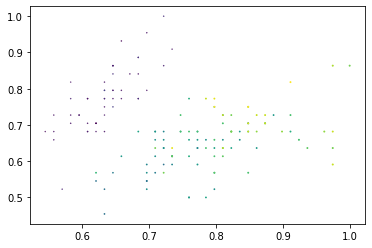

In [6]:
# todos os dados
data=iris_data.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
plt.scatter(data.sepal_length, data.sepal_width, data.petal_length, data.petal_width)

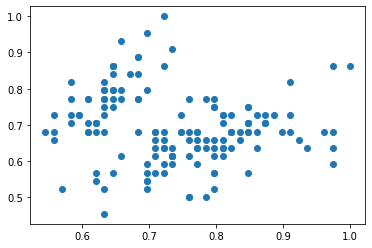

In [7]:
# data only according to sepal
data=iris_data.loc[:,['sepal_length', 'sepal_width']]
plt.scatter(data.sepal_length, data.sepal_width)

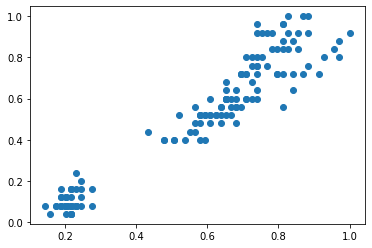

In [8]:
# data accoording only to petal
data=iris_data.loc[:,['petal_length', 'petal_width']]
plt.scatter(data.petal_length, data.petal_width)

> <hr>

### FUZZY C-MEANS

In [9]:
iris_data = np.array(iris_data)
iris_data # shoukd be a 2d array

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08,
        'Iris-setosa'],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08, 'Iris-setosa'],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16, 'Iris-setosa'],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12, 'Iris-setosa'],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04,
        'Iris-setosa'],
       [0.68

In [10]:
iris_data_without_last_column = iris_data[:, :-1]
iris_data_without_last_column

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04],
       [0.6835443037974683, 0.8409090909090908, 0.21739130434782608,
        0.08],
       [0.6075949367088607, 0.7727272727272726, 0.2318840579710145, 0.08],
       [0.607594936

**CONDIÇÕES INICIAIS**

> Acho que aqui vai caber definir algumas coisas como funções e não mais como valores fixos

In [11]:
# number of clusters
    # definido como 3 pq conheço o iris dataset
K = 3

# fuzziness value 
m = [1.1, 1.6, 2]
# os valores definidos acima foram indicados pelo professor

# largura
# sigma = 1
    # agora vamos variar

In [12]:
# cálculo com base na função do artigo que o professor mostrou
def calcular_sigma(iris_data_without_last_column):
    n = iris_data_without_last_column.shape[0]
    total_distance = 0

    # bora por partes pq nem eu e nem o gpt somos deus
    # soma pra todos os pares de distância
    for i in range(n):
        for j in range(n):
            total_distance += np.linalg.norm(iris_data_without_last_column[i] - iris_data_without_last_column[j])**2

    # média e raiz
    sigma = np.sqrt(total_distance / (2 * n**2))
    return sigma

# calcular
sigma = calcular_sigma(iris_data_without_last_column)
print("Largura de banda do kernel (sigma):", sigma)

Largura de banda do kernel (sigma): 0.4219931232129643


**CÓDIGO**

In [13]:
# vamo juntar tudo aqui de maneira que una o feito às coisas novas

In [14]:
# definir um início randomico p U
U = np.random.rand(iris_data_without_last_column.shape[0], K)

In [15]:
# precisamos de 3 centroides pro caso do iris
def calculando_centroides(iris_data_without_last_column, K, U, m):
    centroides = np.zeros((K, iris_data_without_last_column.shape[1]))
    for i in range(K):
        U_corrigido = np.tile(U[:, i][:, np.newaxis], (1, iris_data_without_last_column.shape[1]))
        m_expandido = np.tile(m[i], (iris_data_without_last_column.shape[0], iris_data_without_last_column.shape[1]))
        centroides[i, :] = np.sum((U_corrigido ** m_expandido) * iris_data_without_last_column, axis=0) / np.sum(U_corrigido ** m_expandido)
    return centroides

centroides = calculando_centroides(iris_data_without_last_column, K, U, m)

In [16]:
def gaussian_kernel(iris_data_without_last_column, centroides, sigma):
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]
    distances = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            distances[i, j] = np.linalg.norm(iris_data_without_last_column[i] - centroides[j])

    return np.exp(-distances**2 / (2 * sigma**2))

def kg_membership(iris_data_without_last_column, centroides, sigma):
    """
    Calcula a matriz de membership fuzzy entre os dados e os centroides usando o kernel gaussiano.

    Args:
    iris_data_without_last_column (ndarray): Conjunto de dados.
    centroides (ndarray): Matriz de centroides dos clusters.
    sigma (float): parâmetro de largura!!!!! muito importante futuramente (sim preciso escrever isso em todo lugar para quando a ansiedade bater)
   
   Returns:
    ndarray: matriz de MEMBERSHIP fuzzy
        # lembrando que o pertencimento com kernel é calculado com base nas distâncias
        # então aqui meio que substitui a matriz_dg do FCM
    """
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]
    U_novo = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            x = iris_data_without_last_column[i:i+1]  # Seleciona um ponto de dados como um vetor unidimensional
            c = centroides[j:j+1]  # Seleciona um centróide como um vetor unidimensional
            U_novo[i, j] = gaussian_kernel(x, c, sigma)

    return U_novo # novos valores de pertinência agora foram calculados com KERNEL


U_novo =  kg_membership(iris_data_without_last_column, centroides, sigma)

def matriz_dg(iris_data_without_last_column, centroides):
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]

    distancias = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            distancias[i, j] = np.linalg.norm(iris_data_without_last_column[i] - centroides[j])

    return distancias

matriz_dg = matriz_dg(iris_data_without_last_column, centroides)

# mudando a função objetivo pra considerar o kernel
def fobj_kernel(U_novo, matriz_dg, m):
    """
    Calcula a função objetivo do KFCM

    Args:
    U_novo (ndarray): mmebership atualizado 
        # lembrando que a alteração do kernel foi importante pra calcular ele
    matriz_dg (ndarray): Matriz de distâncias ou similaridades.
    m (float): fuzziffier
                # def como constante

    Returns:
    float: valor da func objetivo
    """
    c, n = U_novo.shape # kernel tá entrando aqui no u_novo
    objetivo = 0

    for i in range(c):
        for j in range(n):
            objetivo += U_novo[i, j] ** m * matriz_dg[i, j] ** 2

    return objetivo

N = iris_data_without_last_column.shape[0] # número de dados
velho_obj = fobj_kernel(U_novo, matriz_dg, m)

In [17]:
maximo = 100

# Inicializar valores de pertinência e centroides
U = np.random.rand(iris_data_without_last_column.shape[0], K)
centroides = calculando_centroides(iris_data_without_last_column, K, U, m)

# Calcular matriz de distâncias inicial
J_anterior = matriz_dg

for iteration in range(maximo):
    # Atualizar valores de pertinência e centroides
    U_novo = kg_membership(iris_data_without_last_column, centroides, sigma)
    centroides = calculando_centroides(iris_data_without_last_column, K, U_novo, m)
    
    # Calcular nova matriz de distâncias
    nova_J = matriz_dg
    
    # Calcular função objetivo
    novo_objetivo = fobj_kernel(U_novo, nova_J, m)

    # Verificar convergência
    if (np.all(nova_J <= J_anterior) or 
        np.all(np.abs(novo_objetivo - velho_obj) < 1e-6) or
        iteration == maximo - 1):
        break

    # Atualizar valores para a próxima iteração
    velho_obj = novo_objetivo
    J_anterior = nova_J

    # Atualizar pertinências para a próxima iteração
    U = U_novo

In [18]:
print("Centroides finais:")
print(centroides)
print()
print("Pertinências dos dados aos centroides (U final):")
print(U)

Centroides finais:
[[0.16267217 0.17461346 0.08219984 0.05586267]
 [0.15830853 0.17387801 0.07237335 0.04493999]
 [0.15589532 0.1728166  0.06745835 0.03964584]]

Pertinências dos dados aos centroides (U final):
[[0.28304974 0.88938646 0.46885726]
 [0.97657028 0.566369   0.67590685]
 [0.20025575 0.60768642 0.90823623]
 [0.3038237  0.57242493 0.78390832]
 [0.34663706 0.60127826 0.16996278]
 [0.48785568 0.16145194 0.50430539]
 [0.71581296 0.24432914 0.12373921]
 [0.59257977 0.24687914 0.2086973 ]
 [0.74079879 0.20502753 0.1549807 ]
 [0.67211317 0.33342516 0.67857858]
 [0.97463886 0.07283373 0.15329297]
 [0.86772263 0.9588646  0.2293554 ]
 [0.01754945 0.16928868 0.38067133]
 [0.65129524 0.46719694 0.8252643 ]
 [0.56483648 0.9805339  0.14206806]
 [0.61944271 0.20807689 0.73933235]
 [0.95328202 0.45913999 0.65002701]
 [0.75396523 0.25794343 0.07274005]
 [0.95530247 0.51027047 0.17602506]
 [0.01376137 0.07142352 0.83792593]
 [0.68741869 0.69312034 0.6207217 ]
 [0.54087911 0.50347955 0.4014349